# Integrantes:

Sara Paguaga 20634
Oscar Estrada 20565
Guillermo Santos 191517
Cayetano Molina  20211

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
file_path = 'dataset/anaemia.csv' 
df = pd.read_csv(file_path)

## Preprocesamiento de datos

In [3]:
print("\nRevisión de valores nulos:")
display(df.isnull().sum())


Revisión de valores nulos:


Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

In [4]:
# Eliminando espacios en blanco en la columna Sex
df['Sex'] = df['Sex'].str.strip()

# Covirtiendo la columna categorica Sex a numerica
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})

In [5]:
# save the cleaned data to a new csv file
df.to_csv('dataset/anaemia_cleaned.csv', index=False)

## Análisis exploratorio

In [6]:
file_path = 'dataset/anaemia_cleaned.csv' 
df = pd.read_csv(file_path)

print("Primeras 5 filas del dataset:")
display(df.head())

Primeras 5 filas del dataset:


,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,1,43.2555,30.8421,25.9025,6.3,Yes
1,2,0,45.6033,28.1900,26.2067,13.5,No
2,3,0,45.0107,28.9677,26.0215,11.7,No
3,4,0,44.5398,28.9899,26.4703,13.5,No
4,5,1,43.2870,30.6972,26.0158,12.4,No


In [7]:
print("\nInformación del dataset:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Sex           104 non-null    int64  
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 5.8+ KB


In [8]:
print("\nDescripción estadística de las variables numéricas:")
display(df.describe())


Descripción estadística de las variables numéricas:


,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,0.528846,45.654175,28.875507,25.470325,12.150962
std,30.166206,0.501584,2.816294,1.554275,1.984671,2.512957
min,1.000000,0.000000,38.796800,25.140300,19.541300,2.800000
25%,26.750000,0.000000,43.911375,27.871300,24.896425,10.650000
50%,52.500000,1.000000,45.385350,28.948750,25.953200,12.600000
75%,78.250000,1.000000,46.968325,29.887275,26.721600,14.000000
max,104.000000,1.000000,54.647800,32.368100,29.841400,16.300000


In [9]:
print("\nDescripción estadística de las variables categóricas:")
display(df.describe(include=['object']))


Descripción estadística de las variables categóricas:


,Anaemic
count,104
unique,2
top,No
freq,78


Anaemic
No     78
Yes    26
Name: count, dtype: int64

/Users/saramariapaguagagonzales/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


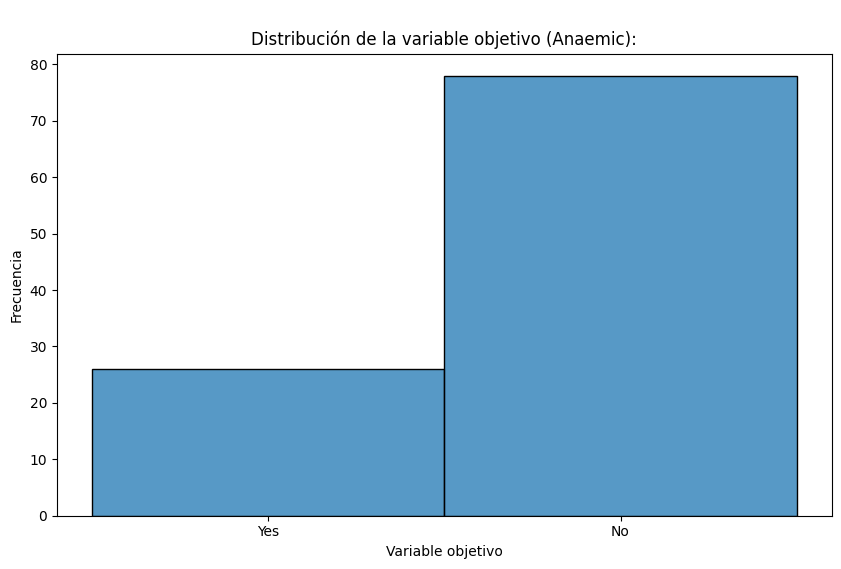

In [10]:
# Distribución de los niveles de 
display(df['Anaemic'].value_counts())
plt.figure(figsize=(10, 6))
sns.histplot(df['Anaemic'])
plt.title('\nDistribución de la variable objetivo (Anaemic):')
plt.xlabel('Variable objetivo')
plt.ylabel('Frecuencia')
plt.show()

/Users/saramariapaguagagonzales/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


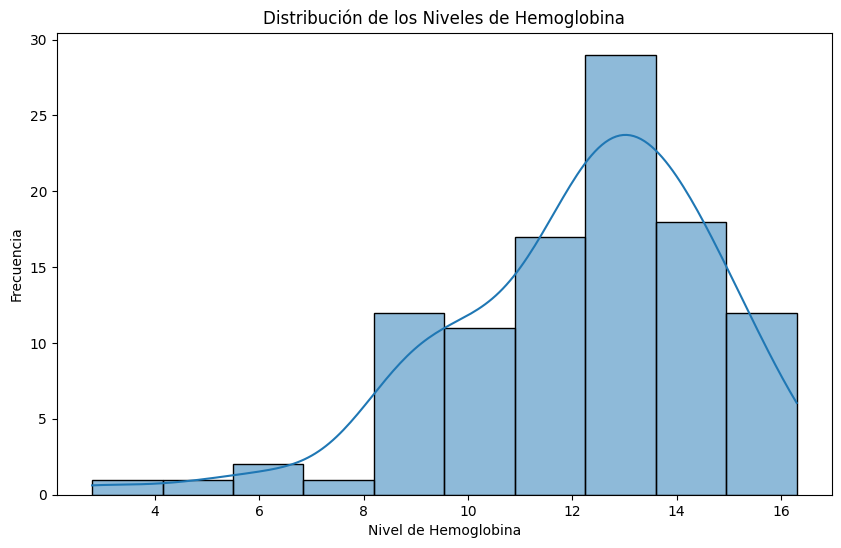

In [11]:
# Distribución de los niveles de hemoglobina
plt.figure(figsize=(10, 6))
sns.histplot(df['Hb'], kde=True)
plt.title('Distribución de los Niveles de Hemoglobina')
plt.xlabel('Nivel de Hemoglobina')
plt.ylabel('Frecuencia')
plt.show()

/Users/saramariapaguagagonzales/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saramariapaguagagonzales/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/saramariapaguagagonzales/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get

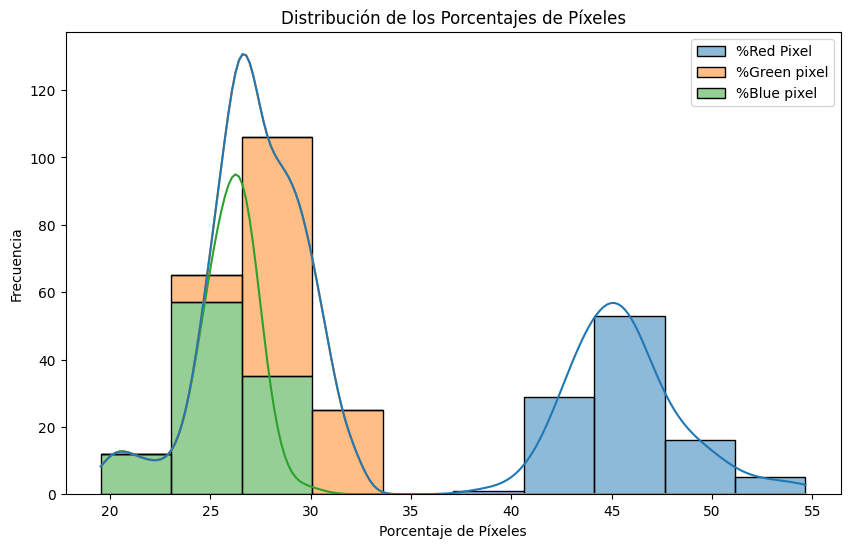

In [12]:
# Distribución de los porcentajes de píxeles
plt.figure(figsize=(10, 6))
sns.histplot(df[['%Red Pixel', '%Green pixel', '%Blue pixel']], kde=True, multiple="stack")
plt.title('Distribución de los Porcentajes de Píxeles')
plt.xlabel('Porcentaje de Píxeles')
plt.ylabel('Frecuencia')
plt.show()

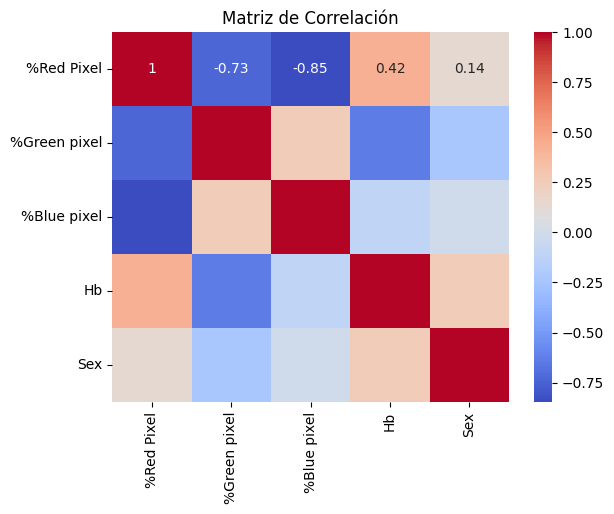

In [13]:
numeric_df = df[['%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb', 'Sex']]
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

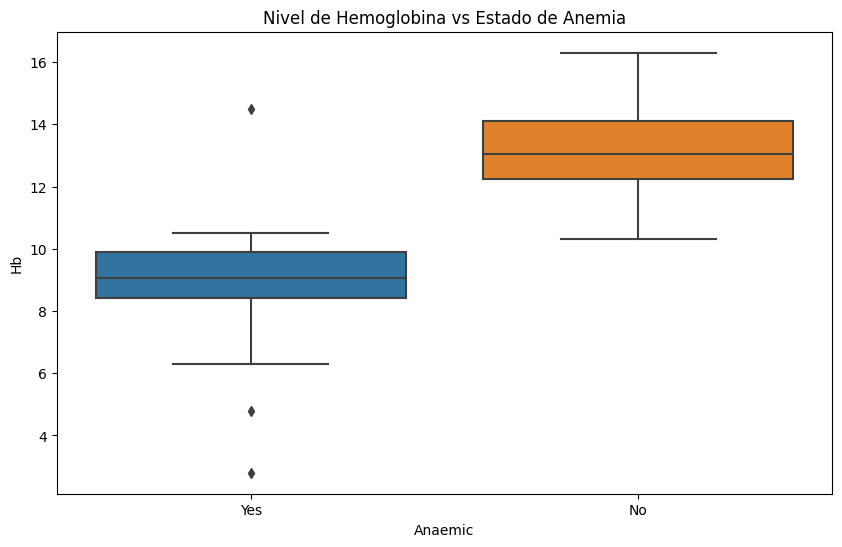

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Anaemic', y='Hb', data=df)
plt.title('Nivel de Hemoglobina vs Estado de Anemia')
plt.show()

In [15]:
# Comparación de las medias de los porcentajes de píxeles entre los grupos anémicos y no anémicos
anaemia_group = df.groupby('Anaemic').mean(numeric_only=True)
print(anaemia_group[['%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb', 'Sex']])

         %Red Pixel  %Green pixel  %Blue pixel         Hb       Sex
Anaemic                                                            
No        46.225991     28.369649    25.404364  13.257692  0.589744
Yes       43.938727     30.393081    25.668208   8.830769  0.346154
